# Data Mining Versuch Fahrzeugdaten

* Autor: Prof. Dr. Johannes Maucher
* Datum: 11.03.2021

**Abzugeben ist das Jupyter Notebook mit dem verlangten Implementierungen, den entsprechenden Ausgaben, Antworten und Diskussionen/Beschreibungen. Das Notebook ist als .ipynb und als .html abzugeben.**

* [Übersicht Jupyter Notebooks im Data Mining Praktikum](http://maucher.pages.mi.hdm-stuttgart.de/ai/page/dm/)


# Einführung
## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Datenimport und Datenexport von und zu 
    * Pandas Dataframes
    * PostgreSQL Datenbanken
* Explorative Datenanalysen (EDA)
* Datenvisualisierung mit Matplotlib und plotly
* Überwachtes Lernen eines Klassifikationsmodells
* Überwachtes Lernen eines Regressionsmodells
* Evaluation von Klassifikationsmodellen
* Evaluation von Regressionsmodellen
* Kreuzvalidierung
* Hyperparameteroptimierung

## Vorbereitung

### Datenbankzugriff
1. Installieren Sie PostgreSQL. Mit PostgreSQL sollte auch pgAdmin installiert werden. PgAdmin ist eine open-source Software für die Entwicklung und die Administration von PostgreSQL Datenbanken.
2. Legen Sie über pgAdmin eine Datenbank für das Datamining-Praktikum an. In diese Datenbank werden alle in diesem Versuch relevanten Tabellen geschrieben.
3. Für den Datenbankzugriff aus Python heraus wird in diesem Versuch [SQLAlchemy](http://docs.sqlalchemy.org/en/latest/intro.html) eingesetzt. Machen Sie sich mit den Basics von SQLAlchemy vertraut, z.B. mithilfe von [https://gitlab.mi.hdm-stuttgart.de/maucher/DataScienceProgramming/blob/master/Python/Lecture/07DataBasePandas.ipynb](https://gitlab.mi.hdm-stuttgart.de/maucher/DataScienceProgramming/blob/master/Python/Lecture/07DataBasePandas.ipynb), Abschnitt *Using SQLAlchemy and Pandas*.

### Pandas Dataframe
Machen Sie sich mit den Grundlagen von Pandas vertraut.


### Machine Learning
Machen Sie sich mit Entscheidungsbäumen, Random Forest, Single Layer Perzeptron und Multi Layer Perzeptron vertraut. 

# Learning

### Was ist SQL Alchemy
Ein Tool um in Python mit relationalen Datenbanken arbeiten zu können. Damit kann man SQL Abfragen erstellen und ORM (object relational mapping) umsetzen.

Quelle: (https://www.plone-entwicklerhandbuch.de/relationale-datenbanken/sqlalchemy.html)

#### Was ist Pandas
* Erweitert numpy, ein Packet in Python um das Arbeiten mit Arrays (besonders Mehrdimensionalen) zu vereinfachen.
* Pandas macht das Arbeiten mit Arrays zum Managen von Daten (zum Beispiel der Umgang mit lückenhaften Daten) noch einfacher, vorallem mithilfe von der Verbesserung von Indizes.

(Quelle: https://maucher.pages.mi.hdm-stuttgart.de/python4datascience/PD01Pandas.html)

In [3]:
# !conda install pandas
import pandas as pd
print(pd.__version__)

1.4.4


##### Series
Sind vergleichbar mit eindimensionalen Arrays mit einem konfigurierbaren Index. 
* Sie können aus Python Dictonaries erstellt werden.
* Mit den klassisch nummerischen Indizes (0,1,..) serie[1] Elemente auswählen.
* Mit eigen definierten string Indizes ("pizza",..) ```serie.loc["Pizza"]``` oder mit eigen definierten integer Indizes ```serie.iloc[:3]```verwenden

In [4]:
names = pd.Series(data=["Joy", "Maxi", "Lea"])
print(names)

0     Joy
1    Maxi
2     Lea
dtype: object


In [5]:
food_evaluation = { "pizza": 10, "pasta": 8, "brokoli": 1}
food_evaluation_serie =pd.Series(food_evaluation)

print(food_evaluation)
print(food_evaluation_serie)

{'pizza': 10, 'pasta': 8, 'brokoli': 1}
pizza      10
pasta       8
brokoli     1
dtype: int64


##### Dataframes
Sind vergleichbar mit zweidimensionalen Arrays mit einem konfigurierbaren Index. 
* Können eigene Spalten definieren und eigene Indexe.
* Sie können aus einer Python List aus Python Dictonaries erstellt werden.
* Eine Spalte kann ausgewählt werden mit ```serie["column"]``` oder  ```serie.column```
* Eine Reihe kann **nicht** ausgewählt werden mit ```serie["row"]```
* Eine Reihe kann ausgewählt werden mit ```serie["row":"row"]``` oder ```serie[0:1]``` aber **besser** mit ```serie.loc["row"]``` oder ```serie.iloc[0]```

(Quelle: https://maucher.pages.mi.hdm-stuttgart.de/python4datascience/PD01Pandas.html)

In [6]:
numbers = pd.DataFrame(data=[[1, 2, 3], [4, 5, 6]])
print(numbers)
print(numbers.values)

   0  1  2
0  1  2  3
1  4  5  6
[[1 2 3]
 [4 5 6]]


In [7]:
people = pd.DataFrame(index=["Maxi", "Lea", "Joy"], data=[["male", 21], ["female", 21], ["female", 21]], columns=["gender", "age"])
print(people)

print("Spalten auswählen:")
print(people["gender"]) # people.gender

print("Zeile auswählen")
print(people["Maxi":"Maxi"])
print(people[0:1])

      gender  age
Maxi    male   21
Lea   female   21
Joy   female   21
Spalten auswählen:
Maxi      male
Lea     female
Joy     female
Name: gender, dtype: object
Zeile auswählen
     gender  age
Maxi   male   21
     gender  age
Maxi   male   21


#### Machine Learning

##### Entscheidungsbäume
* Ein hierarchisches Modell für überwachtes Lernen (Es gibt "Lehrer" der "erklärt" was bestimmte Eingaben bedeuten)
* aus Trainingsdaten wird Entscheidungsbaum gelernt
* für Klassifikation  (Kategoriesieren des gelernten) und Regression (Vorhersage kontinuierlicher Ergebnisse (z.B liegt weiterer Wert an linearer Linie))
* hat eine Baumstruktur 
    * mit einer Eingabe (steht ganz oben) 
    * verschiedenen Verzweigungen
    * Knotenpunkten die entweder ein Ergebnis liefern oder nochmal verzweigt sind
    * mehreren möglichen Ausgaben jeweils am Ende eines ganzen Zweigs
* kann binärerer (onehot encoded mit 0 und 1, nur 0-false und 1-true als zweig) oder nicht binärer baum (kann mehrere zweige haben) sein 
* je mehr eingangswerte man in einen Baum hat desto eher kann man auf die Ausgangswerte schließen (Informationsgewinn)
* Entropie ist das Maß für die Unvorhersehbarkeit  

##### Random Forest
* Wie bagging (paralleles Verfahren zum Lernen von Entscheidungsbäume), man lernt mehrere Modelle parallel und nimmt entweder die am Häufigsten vorkommende Klasse oder den Mittelwert
* Unterschied ist das beim Random Forest nicht bei jedem Baum alle Merkmale beachtet werden sondern nur bestimmte oder zufällige (80%). Dadurch entstehen am ende leicht unterschiedliche Entscheidungsbäume die im Zusammenhang eine höheren Informationsgewinn und eine bessere Vorhersage bieten.

#### Neuronale Netze 
* Eingabeneuronen --> Gewichte --> Aktivierungsfunktion
* Man hat Eingabeneuronen, Gewichte für jedes Neuron am Anfang Zufall, wird in Lernalgorithmus (Aktivierungsfunktion) Eingesetzt und bekommt die Ist-Ausgabe heraus. Die wird mit einer Fehlerfunktion überprüft und dann je nachdem werden die Parameter angepasst. 

#### Aktivierungsfunktionen 
* Schwellwert - Klassifizierung mit harter Entscheidung K1 oder K2, 
* Identity - keine Aktivierung
* Sigmoid k=2 mit weicher Entscheidung
* Softmax k>2 mit weicher Entscheidung

##### Single Layer Perzeptron
* nur Ausgabeschicht ohne hidden layer (also nur eingabe, ausgabe und dazwischen die gewichte)
* vollständige Vernetzung zwischen den Neuronen
* bei K=2 (boolischer Klassifier) ein Ausgabeneuron
* bei K>=2 K ist Anzahl der Ausgabeneuronen
* Regression mit skalarem Funktionswer ein Ausgabeneuron

##### Multi Layer Perzeptron
* mit verborgenen Schichten wo die Ausgänge jeder Schicht mit den Eingängen aller Neuronen der nächsten Schicht verbunden ist (Hidden Layers zwischen Ein- und Ausgabeschicht, 3-Schichtig wäre z.B Eingabe, Mittlere Schicht (mit Eingabe mit Gewichten verbunden), Ausgabeschicht (mit Gewichten mit der Mittleren Schicht verbunden))
* für Regression mit stetigen Funktionen (1 hidden layer), Regression mit nicht stetigen Funktionen (mind. 2 hidden layer) und Klassifikation mit nicht linearen Diskriminanten

(Quelle: Vorlesung Lernblätter KI)

# Durchführung

## Einlesen der Daten aus .csv und Ablage in PostgreSQL
In diesem ersten Teil des Versuchs sollen die relevanten Daten aus dem .csv-File eingelesen und in einer PostgreSQL-Tabelle abgelegt werden. Das benötigte File `Fahrzeuginformationen.csv` liegt im aktuellen Verzeichnis.

1. Laden Sie die .csv-Datei in einen Pandas Dataframe. 

2. Zeigen Sie für den angelegten Dataframe 
    * die ersten 10 Zeilen
    * die Größe (Anzahl Zeilen und Anzahl Spalten)
    * die Anzahl der NaNs pro Spalte
    an. 
3. Zeigen Sie mit der Pandas-Dataframe Methode `info()`, den Datentyp aller Spalten an. Der Typ der Spalte `CO2-Emissionen` ist tatsächlich kein numerischer Typ. Finden Sie heraus warum das so ist. Beheben Sie den *Fehler* und sorgen Sie dafür, dass auch diese Spalte einen numerischen Typ hat.

4. Schreiben Sie den im vorigen Schritt angepassten Dataframe mit der Pandas Methode `to_sql()` in eine Datenbanktabelle mit dem Namen `vehicledata`.

In [8]:
#conda install -y psycopg2
#!conda install -y -c anaconda sqlalchemy

import pandas as pd

In [9]:
# Aufgabe 1

# Load csv 
from numbers import Number
cars_csv=pd.read_csv("fahrzeuginformationen.csv",sep=",",header=0,index_col=False)

# Convert to dataframe
cars = pd.DataFrame(cars_csv)

In [10]:
# Aufgabe 2

# Erste 10 Reihen
print(cars.head(10))

# Die Größe
print("Reihen", len(cars.axes[0])) 
print("Spalten", len(cars.axes[1]))

# Anzahl NaNs pro Spalte
print(cars.isna().sum(axis=0))

  HST Benennung            HT Benennung             UT Benennung  Karosserie  \
0    Volkswagen  T6 Bus (SG)(05.2015->)       Multivan Trendline  Bs           
1    Volkswagen  T6 Bus (SG)(05.2015->)     Multivan Comfortline  Bs           
2    Volkswagen  T6 Bus (SG)(05.2015->)  Multivan Generation Six  Bs           
3    Volkswagen  T6 Bus (SG)(05.2015->)  Multivan 70 Jahre Bulli  Bs           
4    Volkswagen  T6 Bus (SG)(05.2015->)            Multivan Join  Bs           
5    Volkswagen  T6 Bus (SG)(05.2015->)    Multivan PanAmericana  Bs           
6    Volkswagen  T6 Bus (SG)(05.2015->)         Multivan Edition  Bs           
7    Volkswagen  T6 Bus (SG)(05.2015->)       Multivan Join lang  Bs           
8    Volkswagen  T6 Bus (SG)(05.2015->)        Multivan Highline  Bs           
9    Volkswagen  T6 Bus (SG)(05.2015->)        Multivan Business  Bs           

   Neupreis Brutto  Produktgruppe Kraftstoffart Schadstoffklasse   CCM   KW  \
0            37962  T5-Klasse Pkw       

### Aufgabe 3 Problembeschreibung
````cars["CO2-Emissionen"] = pd.to_numeric(cars["CO2-Emissionen"])```` ist die Funktion um die Spalte umzuwandeln. Das Problem ist wenn man das ausführt, dass dort ein Fehler 'Unable to parse string "9,2"' geworfen wird. Das heißt in der Spalte sind Werte enthalten die wir nicht automatisch konvertieren können, da der Python interpreter die Float Werte nur erkennt wenn sie wie im Englischen mit einem '.' beschrieben werden (9,2 --> 9.2). 

### Aufgabe 3 Lösung
Wir schauen uns erst einmal an wie viele Werte betroffen sind, um zu schauen ob es noch anderen Komma trenner (z.B bei Tausend) gibt. Glücklicherweise erkennen wir dort nur 6 Werte die alle mit dem Format x,x geschrieben werden. Um das Problem zu beheben ersetzen wir die komplette CO2-Emissionen Spalte dort wo "," verwendet werden mit einem "." und konvertieren diese gleich mit ``àstype(float)``` in einen Float64. 

In [11]:
import re

# Aufgabe 3

print(cars.info())

# Handle conversion of column CO2 Emissionen
if cars["CO2-Emissionen"].dtype == object:
    # Print all non numeric values, see issues are 6 rows with values like 9,2
    non_numeric = re.compile(r'[^\d.]+')
    display(cars.loc[cars["CO2-Emissionen"].str.contains(non_numeric)]) # https://stackoverflow.com/a/40790077

    # Replace all , to convert 9,2 --> 9.2 
    cars["CO2-Emissionen"] = cars["CO2-Emissionen"].str.replace(',', '.').astype(float)

print("Type of CO2-Emissionen", cars["CO2-Emissionen"].dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24194 entries, 0 to 24193
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HST Benennung               24194 non-null  object 
 1   HT Benennung                24194 non-null  object 
 2   UT Benennung                24194 non-null  object 
 3   Karosserie                  24194 non-null  object 
 4   Neupreis Brutto             24194 non-null  int64  
 5   Produktgruppe               24194 non-null  object 
 6   Kraftstoffart               24194 non-null  object 
 7   Schadstoffklasse            24194 non-null  object 
 8   CCM                         24194 non-null  int64  
 9   KW                          24194 non-null  int64  
 10  HST PS                      24194 non-null  int64  
 11  Getriebeart                 24194 non-null  object 
 12  Getriebe Benennung          24194 non-null  object 
 13  Anzahl der Türen            241

,HST Benennung,HT Benennung,UT Benennung,Karosserie,Neupreis Brutto,Produktgruppe,Kraftstoffart,Schadstoffklasse,CCM,KW,...,Zuladung,Zulässiges GG,Länge,Breite,Höhe,CO2-Emissionen,Min Energieeffizienzklasse,Antrieb,KSTA Motor,HST-HT Benennung
16886,Toyota,C-HR (X10),Hybrid Business Edition,SUV,32097,Kompakt-SUV / Geländewagen,08,6T,1973,131,...,449,1904.835675,4408,1808,1541,"9,2",A+,FA,HYBRID ->B,Toyota-C-HR (X10)
16888,Toyota,C-HR (X10),Hybrid Team D,SUV,33769,Kompakt-SUV / Geländewagen,08,6T,1948,134,...,444,1912.584563,4453,1836,1558,"9,2",A+,FA,HYBRID ->B,Toyota-C-HR (X10)
16893,Toyota,C-HR (X10),Hybrid Lounge,SUV,37758,Kompakt-SUV / Geländewagen,08,6T,1961,136,...,467,1921.574295,4440,1775,1545,"9,2",A+,FA,HYBRID ->B,Toyota-C-HR (X10)
16895,Toyota,C-HR (X10),Hybrid Style Selection,SUV,37180,Kompakt-SUV / Geländewagen,08,6T,1926,139,...,449,1961.793375,4459,1817,1513,"9,2",A+,FA,HYBRID ->B,Toyota-C-HR (X10)
16897,Toyota,C-HR (X10),Hybrid Orange Edition,SUV,40538,Kompakt-SUV / Geländewagen,08,6T,1908,128,...,427,1974.373493,4399,1799,1544,"9,2",A+,FA,HYBRID ->B,Toyota-C-HR (X10)
18186,Seat,Ateca (KH7)(03.2016->),Style,SUV,25885,Kompakt-SUV / Geländewagen,BS,E6,1396,106,...,638,1902.668348,4254,1816,1597,"8,5",B,FA,STANDARD ->B,Seat-Ateca (KH7)(03.2016->)


Type of CO2-Emissionen float64


## Exemplarische Datenbankabfragen

1. Verwenden Sie Pandas Dataframe Methode `read_sql_query()` um 3 für Sie interessante Datenbankabfragen zu implementieren. Die Resultate der Abfragen werden in einen Pandas Dataframe geschrieben. Zeigen Sie diese an. 

In [12]:
import psycopg2 #provides drivers for PostgreSQL
import numpy as np
import json #required to access json file
import pandas as pd
import sqlalchemy as sa


# Get json config
with open('../config.json') as f:
    config = json.load(f)

# Connection string variables
db_host = config["host"]
db_database = config["database"]
db_user = config["user"]
db_password = config["password"]

# Connect to database
connection_string ='postgresql://%s:%s@localhost:5432/%s'%(config["user"], config["password"], config["database"])
print(f"Connecting to database {db_database}")

engine = sa.create_engine(connection_string)
inspector = sa.inspect(engine)

# Create table cars
if not inspector.has_table("cars"):
    cars.to_sql(name='cars',index=True, index_label='index',con=engine)
else:
    print("table already exists")

# Read and print cars
with engine.connect() as connection, connection.begin():
    cars_table = pd.read_sql_table('cars',connection)

Connecting to database datamining
table already exists


In [13]:
pd.read_sql_query("SELECT * FROM cars", engine)

,index,HST Benennung,HT Benennung,UT Benennung,Karosserie,Neupreis Brutto,Produktgruppe,Kraftstoffart,Schadstoffklasse,CCM,...,Zuladung,Zulässiges GG,Länge,Breite,Höhe,CO2-Emissionen,Min Energieeffizienzklasse,Antrieb,KSTA Motor,HST-HT Benennung
0,0,Volkswagen,T6 Bus (SG)(05.2015->),Multivan Trendline,Bs,37962,T5-Klasse Pkw,BS,E6,1896,...,905,2967.615635,4852,1849,2019,218,D,FA,STANDARD ->B,Volkswagen-T6 Bus (SG)(05.2015->)
1,1,Volkswagen,T6 Bus (SG)(05.2015->),Multivan Comfortline,Bs,45294,T5-Klasse Pkw,BS,E6,1990,...,753,3061.848723,4859,1827,1938,218,D,FA,STANDARD ->B,Volkswagen-T6 Bus (SG)(05.2015->)
2,2,Volkswagen,T6 Bus (SG)(05.2015->),Multivan Generation Six,Bs,48675,T5-Klasse Pkw,BS,E6,1943,...,768,3018.887414,4788,1823,1990,218,D,FA,STANDARD ->B,Volkswagen-T6 Bus (SG)(05.2015->)
3,3,Volkswagen,T6 Bus (SG)(05.2015->),Multivan 70 Jahre Bulli,Bs,47201,T5-Klasse Pkw,BS,E6,2013,...,1007,3096.198902,4927,1952,1935,210,D,FA,STANDARD ->B,Volkswagen-T6 Bus (SG)(05.2015->)
4,4,Volkswagen,T6 Bus (SG)(05.2015->),Multivan Join,Bs,49453,T5-Klasse Pkw,BS,E6,1945,...,972,3068.590854,4916,1872,2026,210,D,FA,STANDARD ->B,Volkswagen-T6 Bus (SG)(05.2015->)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24189,24189,Ford,Galaxy (CDR)(2015->),Titanium,Van,48042,Van,D,6T,2036,...,798,2674.077424,4756,1911,1779,158,B,FA,STANDARD ->D,Ford-Galaxy (CDR)(2015->)
24190,24190,Ford,Galaxy (CDR)(2015->),Titanium,Van,48979,Van,D,6T,1974,...,775,2599.765400,4605,1977,1738,162,B,FA,STANDARD ->D,Ford-Galaxy (CDR)(2015->)
24191,24191,Ford,S-Max (CDR)(2015->),ST-Line,Van,50849,Van,D,6T,2018,...,804,2546.332693,5033,2011,1592,153,B,FA,STANDARD ->D,Ford-S-Max (CDR)(2015->)
24192,24192,Ford,S-Max (CDR)(2015->),Vignale,Van,52973,Van,D,6T,1968,...,820,2504.075063,4795,1941,1602,153,B,FA,STANDARD ->D,Ford-S-Max (CDR)(2015->)


In [82]:
pd.read_sql_query("SELECT * FROM cars", engine)

,index,HST Benennung,HT Benennung,UT Benennung,Karosserie,Neupreis Brutto,Produktgruppe,Kraftstoffart,Schadstoffklasse,CCM,...,Zuladung,Zulässiges GG,Länge,Breite,Höhe,CO2-Emissionen,Min Energieeffizienzklasse,Antrieb,KSTA Motor,HST-HT Benennung
0,0,Volkswagen,T6 Bus (SG)(05.2015->),Multivan Trendline,Bs,37962,T5-Klasse Pkw,BS,E6,1896,...,905,2967.615635,4852,1849,2019,218,D,FA,STANDARD ->B,Volkswagen-T6 Bus (SG)(05.2015->)
1,1,Volkswagen,T6 Bus (SG)(05.2015->),Multivan Comfortline,Bs,45294,T5-Klasse Pkw,BS,E6,1990,...,753,3061.848723,4859,1827,1938,218,D,FA,STANDARD ->B,Volkswagen-T6 Bus (SG)(05.2015->)
2,2,Volkswagen,T6 Bus (SG)(05.2015->),Multivan Generation Six,Bs,48675,T5-Klasse Pkw,BS,E6,1943,...,768,3018.887414,4788,1823,1990,218,D,FA,STANDARD ->B,Volkswagen-T6 Bus (SG)(05.2015->)
3,3,Volkswagen,T6 Bus (SG)(05.2015->),Multivan 70 Jahre Bulli,Bs,47201,T5-Klasse Pkw,BS,E6,2013,...,1007,3096.198902,4927,1952,1935,210,D,FA,STANDARD ->B,Volkswagen-T6 Bus (SG)(05.2015->)
4,4,Volkswagen,T6 Bus (SG)(05.2015->),Multivan Join,Bs,49453,T5-Klasse Pkw,BS,E6,1945,...,972,3068.590854,4916,1872,2026,210,D,FA,STANDARD ->B,Volkswagen-T6 Bus (SG)(05.2015->)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24189,24189,Ford,Galaxy (CDR)(2015->),Titanium,Van,48042,Van,D,6T,2036,...,798,2674.077424,4756,1911,1779,158,B,FA,STANDARD ->D,Ford-Galaxy (CDR)(2015->)
24190,24190,Ford,Galaxy (CDR)(2015->),Titanium,Van,48979,Van,D,6T,1974,...,775,2599.765400,4605,1977,1738,162,B,FA,STANDARD ->D,Ford-Galaxy (CDR)(2015->)
24191,24191,Ford,S-Max (CDR)(2015->),ST-Line,Van,50849,Van,D,6T,2018,...,804,2546.332693,5033,2011,1592,153,B,FA,STANDARD ->D,Ford-S-Max (CDR)(2015->)
24192,24192,Ford,S-Max (CDR)(2015->),Vignale,Van,52973,Van,D,6T,1968,...,820,2504.075063,4795,1941,1602,153,B,FA,STANDARD ->D,Ford-S-Max (CDR)(2015->)


In [111]:

#pd.read_sql_query("SELECT * FROM cars WHERE \"HST Benennung\" LIKE '%%Volkswagen%%'", engine)

pd.read_sql_query("""SELECT * FROM cars WHERE "HST Benennung"='Volkswagen'""", engine)

,index,HST Benennung,HT Benennung,UT Benennung,Karosserie,Neupreis Brutto,Produktgruppe,Kraftstoffart,Schadstoffklasse,CCM,...,Zuladung,Zulässiges GG,Länge,Breite,Höhe,CO2-Emissionen,Min Energieeffizienzklasse,Antrieb,KSTA Motor,HST-HT Benennung
0,0,Volkswagen,T6 Bus (SG)(05.2015->),Multivan Trendline,Bs,37962,T5-Klasse Pkw,BS,E6,1896,...,905,2967.615635,4852,1849,2019,218,D,FA,STANDARD ->B,Volkswagen-T6 Bus (SG)(05.2015->)
1,1,Volkswagen,T6 Bus (SG)(05.2015->),Multivan Comfortline,Bs,45294,T5-Klasse Pkw,BS,E6,1990,...,753,3061.848723,4859,1827,1938,218,D,FA,STANDARD ->B,Volkswagen-T6 Bus (SG)(05.2015->)
2,2,Volkswagen,T6 Bus (SG)(05.2015->),Multivan Generation Six,Bs,48675,T5-Klasse Pkw,BS,E6,1943,...,768,3018.887414,4788,1823,1990,218,D,FA,STANDARD ->B,Volkswagen-T6 Bus (SG)(05.2015->)
3,3,Volkswagen,T6 Bus (SG)(05.2015->),Multivan 70 Jahre Bulli,Bs,47201,T5-Klasse Pkw,BS,E6,2013,...,1007,3096.198902,4927,1952,1935,210,D,FA,STANDARD ->B,Volkswagen-T6 Bus (SG)(05.2015->)
4,4,Volkswagen,T6 Bus (SG)(05.2015->),Multivan Join,Bs,49453,T5-Klasse Pkw,BS,E6,1945,...,972,3068.590854,4916,1872,2026,210,D,FA,STANDARD ->B,Volkswagen-T6 Bus (SG)(05.2015->)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,24085,Volkswagen,Sharan (7N2)(04.2015->),Highline BMT/Start-Stopp 4Motion,Van,49204,Van,D,E6,1990,...,722,2545.604812,4983,1929,1784,149,A,A,STANDARD ->D,Volkswagen-Sharan (7N2)(04.2015->)
2181,24086,Volkswagen,Sharan (7N2)(04.2015->),Sound BMT/Start-Stopp 4Motion,Van,49309,Van,D,E6,1986,...,714,2540.659757,4897,1860,1728,149,A,A,STANDARD ->D,Volkswagen-Sharan (7N2)(04.2015->)
2182,24087,Volkswagen,Sharan (7N2)(04.2015->),Join Start-Stopp 4Motion,Van,49442,Van,D,E6,1956,...,696,2621.145747,4844,1989,1744,149,A,A,STANDARD ->D,Volkswagen-Sharan (7N2)(04.2015->)
2183,24093,Volkswagen,Touran (5T1)(04.2015->),Highline BMT/Start-Stopp,Van,38058,Kompaktvan,D,E6,2002,...,696,2236.527239,4525,1880,1687,122,A,FA,STANDARD ->D,Volkswagen-Touran (5T1)(04.2015->)


## Data Exploration
1. Zeigen Sie für alle Spalten die Anzahl der unterschiedlichen Werte in dieser Spalte an.
2. Benutzen Sie die Pandas Dataframe Methode `describe()` um sämtliche deskriptiven Statistiken anzuzeigen.
3. Legen Sie eine Liste `numeric_features` an, welche nur die Spaltennamen der numerischen Spalten enthält.
4. Schreiben Sie die Namen aller nicht-numerischen Spalten in eine Liste `categoric_features`.
5. Visualisieren Sie für die Spalten `HST_Benennung`, `Neupreis Brutto`, `CO2-Emissionen` und `Produktgruppe` die Verteilung der Werte in einem Barplot bzw. Histogramm.

In [80]:
# 1.
for column in cars:
  print(f"{column}: {cars[column].nunique()}")

HST Benennung: 42
HT Benennung: 617
UT Benennung: 3782
Karosserie: 22
Neupreis Brutto: 19739
Produktgruppe: 28
Kraftstoffart: 14
Schadstoffklasse: 4
CCM: 2197
KW: 428
HST PS: 560
Getriebeart: 2
Getriebe Benennung: 103
Anzahl der Türen: 4
Leergewicht: 1833
Zuladung: 1208
Zulässiges GG: 23919
Länge: 2342
Breite: 651
Höhe: 1203
CO2-Emissionen: 279
Min Energieeffizienzklasse: 8
Antrieb: 3
KSTA Motor: 6
HST-HT Benennung: 617


In [17]:
# 2.
print(cars.describe())

       Neupreis Brutto           CCM            KW        HST PS  \
count     24194.000000  24194.000000  24194.000000  24194.000000   
mean      40301.051790   1851.156361    126.653798    172.273126   
std       22037.781929    616.193218     60.835718     82.667899   
min        6835.000000    831.000000     42.000000     51.000000   
25%       26910.000000   1482.000000     88.000000    120.000000   
50%       36720.000000   1941.000000    111.000000    151.000000   
75%       47632.250000   2011.000000    141.000000    192.000000   
max      287347.000000   6706.000000    511.000000    705.000000   

       Anzahl der Türen   Leergewicht      Zuladung  Zulässiges GG  \
count      24194.000000  24194.000000  24194.000000   24194.000000   
mean           4.480656   1588.890303    578.716211    2134.695183   
std            0.880526    367.170624    191.292064     524.077515   
min            2.000000     29.000000     58.000000       0.000000   
25%            4.000000   1381.000000

In [18]:
# 3. 
numeric_features = cars.select_dtypes(include=np.number).columns.tolist()
print(numeric_features)

['Neupreis Brutto', 'CCM', 'KW', 'HST PS', 'Anzahl der Türen', 'Leergewicht', 'Zuladung', 'Zulässiges GG', 'Länge', 'Breite', 'Höhe', 'CO2-Emissionen']


In [19]:
# 4. 
categoric_features = cars.select_dtypes(exclude=np.number).columns.tolist()
print(categoric_features)

['HST Benennung', 'HT Benennung', 'UT Benennung', 'Karosserie', 'Produktgruppe', 'Kraftstoffart', 'Schadstoffklasse', 'Getriebeart', 'Getriebe Benennung', 'Min Energieeffizienzklasse', 'Antrieb', 'KSTA Motor', 'HST-HT Benennung']


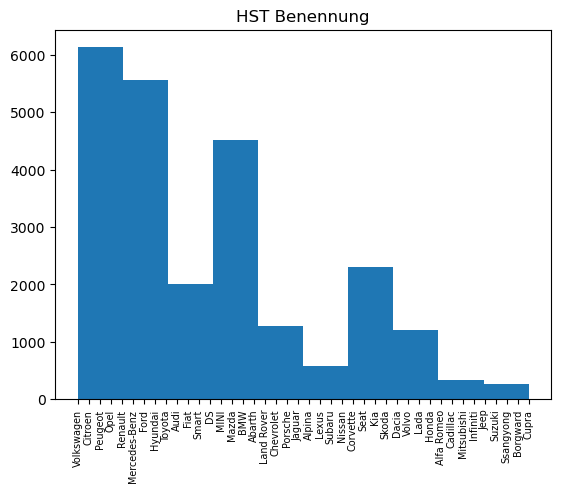

In [134]:
# 5.
%matplotlib inline
from matplotlib import pyplot as plt

plt.hist(cars["HST Benennung"])
plt.title('HST Benennung')
plt.xticks(rotation='vertical', fontsize = 'x-small')
plt.show()

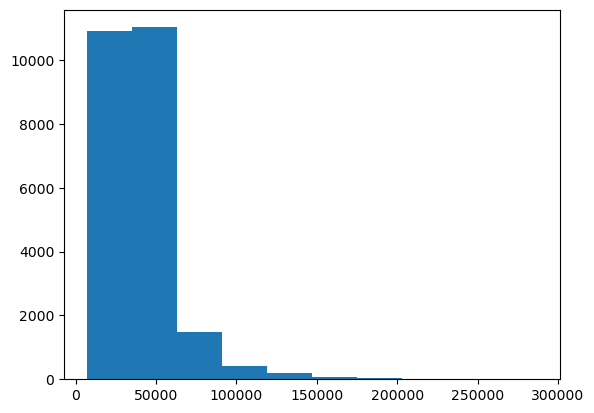

In [21]:
plt.hist(cars["Neupreis Brutto"])
plt.title("Neupreis Brutto")
plt.show()

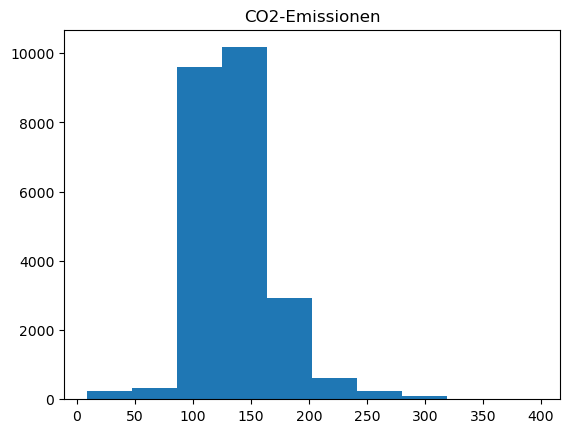

In [135]:
plt.hist(cars["CO2-Emissionen"])
plt.title('CO2-Emissionen')
plt.show()

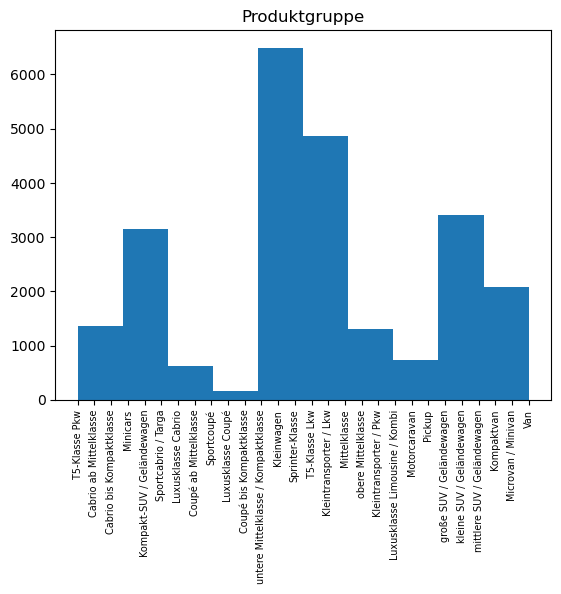

In [137]:
plt.hist(cars["Produktgruppe"])
plt.title("Produktgruppe")
plt.xticks(rotation='vertical', fontsize = 'x-small')
plt.show()

### Data Encoding

1. Categoriale Merkmale ohne Ordnungsrelation (=nominale Merkmale) müssen One-Hot-Encodiert werden. Führen Sie für die drei categorialen Merkmale ein One-Hot-Encoding mit dem [scikit-learn LabelBinarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html) durch.
2. Fügen Sie die one-hot-encodierten Spalten mit den numerischen Spalten zusammen. Weisen Sie die entsprechende Eingabedatenmatrix einem 2-dimensionalen numpy-array `X` zu. 
3. Führen Sie auf die Zielvariable `Produktgruppe` ein Label-Encoding mit [scikit-learn LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder) aus. Weisen Sie diese Daten dem 1-dimensionalen numpy-array `y` zu.

In [165]:
#!conda install scikit-learn
from sklearn.preprocessing import LabelBinarizer

print(categoric_features)

# Initialize Label binarizer
lb = LabelBinarizer()

['HST Benennung', 'HT Benennung', 'UT Benennung', 'Karosserie', 'Produktgruppe', 'Kraftstoffart', 'Schadstoffklasse', 'Getriebeart', 'Getriebe Benennung', 'Min Energieeffizienzklasse', 'Antrieb', 'KSTA Motor', 'HST-HT Benennung']


In [190]:
cars_one_hot_encoded = []

# TODO: more that three categorical features?
# TODO: Ask how array should look? why two dimensional?

for column in categoric_features:
    # Get all possible classes 
    lb.fit(cars[column])
    lb.classes_

    # One hot encode all rows
    encoded_column = lb.transform(cars[column])
    cars_one_hot_encoded.append(encoded_column)

for column in numeric_features:
    cars_one_hot_encoded.append(cars[column].to_numpy())


[array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
   

### Generate Training- and Testpartition
Benutzen Sie die [scikit-learn Methode train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) um `X` und `y` in einer Trainings- und Testpartition aufzuteilen. 30% der Daten soll für das Testen, 70% für das Training benutzt werden.

In [174]:
from sklearn.model_selection import train_test_split

# Splits data into 30% test and 70% training data and gets shuffled by default
(cars_train, cars_test) = train_test_split(cars, train_size=0.7, test_size=0.3)

display(len(cars_train))
display(len(cars_test))

16935

7259

### Decision Tree Training, Test and Evaluation
1. Trainieren Sie einen [Entscheidungsbaum](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) mit den Trainingsdaten.
2. Wenden Sie den gelernten Entscheidungsbaum auf die Testdaten.
3. Evaluieren Sie die Qualität des Entscheidungsbaumes indem Sie 
     - einen [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) erzeugen. 
     - die [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) plotten.
 
 Interpretieren Sie das Ergebnis.
 
4. Führen Sie eine [10-fache Kreuzvalidierung](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) des Entscheidungsbaumes mit den Daten `X` und `y` aus. Interpretieren Sie das Ergebnis.
5. Bestimmen Sie die *Wichtigkeit* der Eingabemerkmale für die Klassifikationsaufgabe, indem Sie auf den in 1.) gelernten DecisionTree das Attribut `feature_importance_` abfragen. Stellen Sie die Werte in einem Barplot dar.

### Random Forest Training, Test and Evaluation
Wiederholen Sie die Teilaufgaben 1. bis 5. des Entscheidungsbaums für einen [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Vergelichen Sie die Performance der beiden Verfahren.

## Machine Learning 2: Schätzung der CO2-Emission
In diesem Teilversuch soll aus den Eingabemerkmalen 

`"CCM","HST PS", "Anzahl der Türen", "Leergewicht", "Zuladung", "Länge", "Breite", "Höhe"`

die Zielvariable 

`CO2-Emissionen`

geschätzt werden. Hierzu soll ein möglichst gutes Regressionsmodell trainiert werden.

### Visuelle Korrelationsanalyse
1. Stellen Sie für jedes der 8 Eingabemerkmale die Korrelation mit der Zielvariablen visuell in einem Scatterplot dar, in dem das jeweilige Eingabemerkmal auf der x-Achse und die Zielvariable auf der y-Achse aufgetragen wird.
2. Diskutieren Sie die Korrelationen. Welche Merkmale korrelieren am stärksten mit der Zielvariable? Erscheint Ihnen das plausibel?

### Data Encoding
1. Weisen Sie die Matrix der Eingabedaten dem 2-dimensionalen Array `X` und die Zielvariable dem 1-dimensionalen Array `y` zu.
2. Führen Sie auf `X` und `y` eine Partitionierung in Trainings- und Testdaten durch, wieder im Verhältnis 70/30.
3. Skalieren Sie die Eingabevariablen und die Zielvariable mit dem [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). Die Skalierung muss sowohl auf Trainings- als auch auf Testdaten ausgeführt werden. Warum darf die Skalierung erst nach dem Split in die beiden Partitionen ausgeführt werden? Worauf ist zu achten? 

### Training, Test und Evaluation verschiedener Regressionsmodelle

Führen Sie die folgenden Teilaufgaben sowohl für ein [Single Layer Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) als auch für ein [Multi Layer Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) mit 20 Neuronen in der Hidden-Schicht durch. Vergleichen Sie am Ende die Performance der beiden Verfahren.
1. Trainieren Sie den Algorithmus mit den Trainingsdaten.
2. Wenden Sie das gelernte Modell auf die Testdaten an.
3. Evaluieren Sie die Qualität der Modelle, indem Sie auf die vorhergesagten Ausgaben und die wahren Ausgaben die unten gegebene Funktion aufrufen.
4. Beschreiben Sie kurz die in der Funktion verwendeten Metriken

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
def determineRegressionMetrics(y_test,y_pred,title=""):
    mse = mean_squared_error(y_test, y_pred)
    mad = mean_absolute_error(y_test, y_pred)
    rmsle=np.sqrt(mean_squared_error(np.log(y_test+1),np.log(y_pred+1)))# +1 for avoiding log(0) 
    r2=r2_score(y_test, y_pred)
    med=median_absolute_error(y_test, y_pred)
    print(title)
    print("Mean absolute error =", round(mad, 2))
    print("Mean squared error =", round(mse, 2))
    print("Median absolute error =", round(med, 2))
    print("R2 score =", round(r2, 2))
    print("Root Mean Squared Logarithmic Error =",rmsle)

### Hyperparameteroptimierung

Für ein [Multi Layer Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) soll eine Hyperparameteroptimierung durchgeführt werden. Ziel ist es innerhalb der unten vorgegebenen Wertebereiche für die Hyperparameter `hidden_layer_sizes`, `activation` und `learning_rate` die beste Konfiguration zu finden. Hierzu kann entweder [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) oder [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) eingesetzt werden. GridSearchCV testet einfach alle Konfigurationen durch, benötigt daher aber viel Zeit. RandomizedSearchCV geht heuristisch und damit schneller durch den Suchraum. Wenden Sie eines dieser beiden Verfahren an, um für das unten gegebene Parameter-Grid die optimale Konfiguration zu finden. Welches ist die optimale Konfiguration und zu welchem `neg_mean_absolute_error`  führt diese?

In [ ]:
param_grid = [{'hidden_layer_sizes': [(10,),(20,),(30,),(40,),(50,),(100,),(10,10)], 
               'activation': ["logistic", "tanh", "relu"], 
               'learning_rate': ["constant", "invscaling", "adaptive"]}]
param_grid

[{'hidden_layer_sizes': [(10,), (20,), (30,), (40,), (50,), (100,), (10, 10)],
  'activation': ['logistic', 'tanh', 'relu'],
  'learning_rate': ['constant', 'invscaling', 'adaptive']}]